In [1]:
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Individual Call Rate Visualization

In [2]:
i = "../individual_stats/139977.170112.2326.GGPHDV3.imiss"

In [3]:
#So when we read  this into pandas datatable, we see that what we're interested in is the F_MISS statistic
#This is the proportion of missing genotypes per individual
#Our current filtering value is 0.05, so anything that is missing more than 5% of genotypes will be dropped
infile= pd.read_table(i,delim_whitespace=True)
infile.head()

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS
0,1,SIMAUSF0000LCSPE358,Y,113,135702,0.000833
1,1,SIMAUSF0000LCSPH376,Y,225,135702,0.001658
2,1,SIMUSAF000001929360,Y,752,135702,0.005542
3,1,SIMUSAF000002016914,Y,123,135702,0.000906
4,1,SIMUSAF000002036442,Y,166,135702,0.001223


In [15]:
#When we limit the ylimit to ~50, that allows us to pick up the bins with lower frequency values. 
#Notice the y axis.  Not showing all of the animals, vast majority of them are going to have missing genotypes VERY close to zero
#Limiting the y axis allows us to see the animals that are likely being excluded in our analyses.
#Made some changes to color and font size in this.  I think that things look readable, not going to be publishing this stuff
#

ax =infile.F_MISS.plot.hist(bins=50, ylim=(0,50),color='g')
ax.set_axis_bgcolor('white')
ax.set_xlabel("Proportion of Genotypes Missing per Individual")
ax.set_ylabel("Number of Animals")
z=i.strip("../individual_stats/")
title=z.strip('.imiss')
ax.set_title(title + ' Individual Call Rates')
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(15)
plt.show()

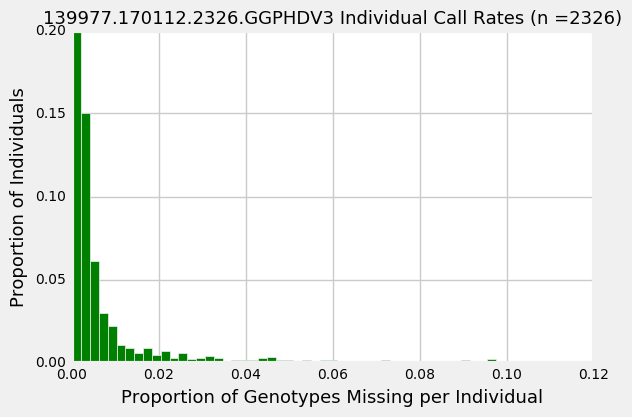

In [4]:
#This version has a scaled y axis to show the proportion of individuals in each bin.
#We allow the x axis to auto-format, so it will max out at the maximum proportion of missing genotypes per individual
#Also have added in new title that includes the number of animals in the analysis.  
lines = infile.F_MISS
weights = np.ones_like(lines)/len(lines)
ax =infile.F_MISS.plot.hist(bins=50, ylim=(0,.2),color='g',weights=weights)
ax.set_axis_bgcolor('white')
ax.set_xlabel("Proportion of Genotypes Missing per Individual")
ax.set_ylabel("Proportion of Individuals")
z=i.strip("../individual_stats/")
title=z.strip('.imiss')
ax.set_title(title + ' Individual Call Rates (n ='+ str(len(lines))+')')
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(13)
plt.show()

In [6]:
z=i.strip("../individual_stats/")
title=z.strip('.imiss')
fig = ax.get_figure()
outname=title + '_individual_call_rate.png'
fig.savefig('../allele_stats/figures/'+ outname,format='png')
plt.close('all')
#In final code I changed this section to just write it to the name given by argv
#When doing it that way, that means that it can be named whatever in Snakemake.  

NameError: name 'ax' is not defined

# SNP Call Rate Visualization

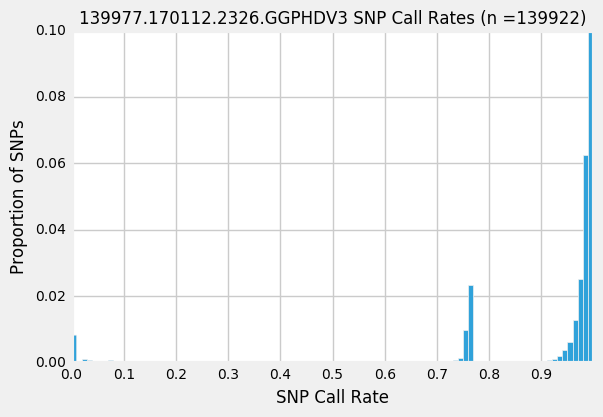

In [7]:
a = '../snp_stats/139977.170112.2326.GGPHDV3.frq'
assay= pd.read_table(a,delim_whitespace=True)
chromosomes = assay.NCHROBS.max() 
#So for this, I'm assuming that there is at least one position that is genotyped on every animal
#If this isn't the case, it is highly unlikely that it would throw calculations off enough, especially for this visualization
assay['Callrate']= assay['NCHROBS']/chromosomes
#This might need to be more variable than in individuals
#Because we have such a difference in call rates for F250 vs. other assays, this might look a little out of whack sometimes
#This looks to be the sweetspot for most assays (100 bins and 5000 as y max)
lines = assay.Callrate
weights = np.ones_like(lines)/len(lines)
ax = assay.Callrate.plot.hist(bins = 100, ylim=(0,0.1), weights=weights)
ax.set_axis_bgcolor('white')
ax.set_xlabel("SNP Call Rate")
ax.set_ylabel("Proportion of SNPs")
plt.xticks(np.arange(min(assay.Callrate), max(assay.Callrate), .1))
z=a.strip("../snp_stats/")
title=z.strip('.frq')
ax.set_title(title + ' SNP Call Rates (n ='+ str(len(lines))+')') 
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(12)
plt.show()

# HWE P Value Visualization

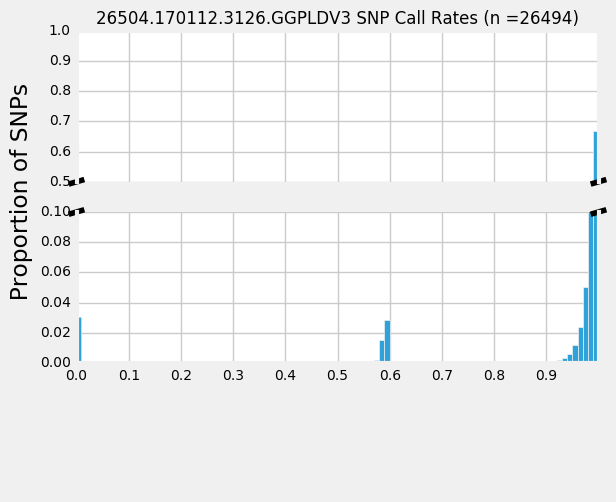

In [36]:
a = '../snp_stats/26504.170112.3126.GGPLDV3.frq'
assay= pd.read_table(a,delim_whitespace=True)
chromosomes = assay.NCHROBS.max() 
assay['Callrate']= assay['NCHROBS']/chromosomes
lines = assay.Callrate
weights = np.ones_like(lines)/len(lines)
#ax = assay.Callrate.plot.hist(bins = 100, weights=weights)

f, axis = plt.subplots(2, 1, sharex=True)
ax_0 = assay.Callrate.plot.hist(bins = 100, weights=weights, ax=axis[0])
ax_1 = assay.Callrate.plot.hist(bins = 100, weights=weights, ax=axis[1])
axis[0].set_axis_bgcolor('white')
axis[1].set_axis_bgcolor('white')
ax.set_xlabel("SNP Call Rate")
axis[1].set_ylabel("                          Proportion of SNPs")
axis[0].set_ylabel("")

axis[0].set_ylim(0.5, 1.0)
axis[1].set_ylim(0, 0.1)

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()

d = .015
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)

plt.xticks(np.arange(min(assay.Callrate), max(assay.Callrate), .1))
z=a.strip("../snp_stats/")
title=z.strip('.frq')
ax_0.set_title(title + ' SNP Call Rates (n ='+ str(len(lines))+')') 
for item in(ax_0.get_xticklabels() + ax_0.get_yticklabels() + ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(10)
for item in ([ax_0.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(12)
plt.show()

In [63]:
h = '../hwe_stats/58336.170112.3399.SNP50C.hwe'
outfile ='../test.png'
assay= pd.read_table(h,delim_whitespace=True)
low_p = assay[(assay.P<=0.001)]
#Here, we're looking only at P-values below 10^-3
#This should make the histogram a little more interesting
ax = low_p.P.plot.hist(bins =50, xlim=(0,0.001), color='r')
ax.set_axis_bgcolor('white')
ax.set_xlabel("HWE P-Value")
ax.set_ylabel("Number of SNPs")
z=h.strip("../hwe_stats/")
title=z.strip('.hwe')
ax.set_title(title + ' HWE P-Values (n ='+ str(len(lines))+')')
plt.xscale('log')
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(15)
fig = ax.get_figure()
fig.savefig(outfile, format='png')
plt.close('all')

In [59]:
h = '../hwe_stats/30105.170112.2500.GGPLDV4.hwe'
assay= pd.read_table(h,delim_whitespace=True)
low_p = assay[(assay.P<=0.001)]
lines = assay.P
weights = np.ones_like(lines)/len(lines)

array([  3.42196215e-05,   3.42196215e-05,   3.42196215e-05, ...,
         3.42196215e-05,   3.42196215e-05,   3.42196215e-05])

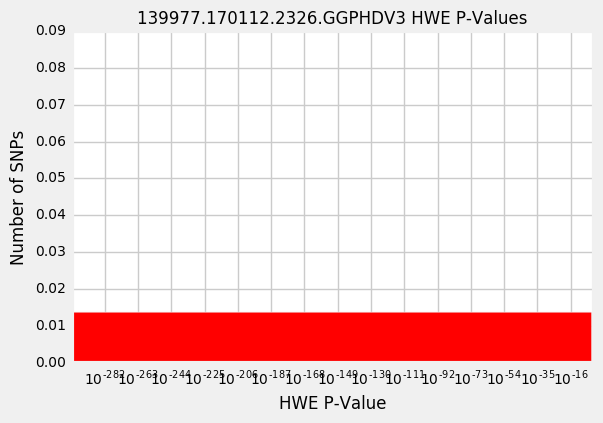

In [18]:
h = '../hwe_stats/139977.170112.2326.GGPHDV3.hwe'
assay= pd.read_table(h,delim_whitespace=True)
low_p = assay[(assay.P<=0.001)]
#Here, we're looking only at P-values below 10^-3
#This should make the histogram a litt-le more interesting
lines = assay.P
weights = np.ones_like(lines)/len(lines)
ax = assay.P.plot.hist(bins =10000, xlim=(0,0.001), color='r', weights=weights)
ax.set_axis_bgcolor('white')
ax.set_xlabel("HWE P-Value")
ax.set_ylabel("Number of SNPs")
z=h.strip("../hwe_stats/")
title=z.strip('.hwe')
ax.set_title(title + ' HWE P-Values')
plt.xscale('log')
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(12)
plt.show()

In [16]:
h = '../hwe_stats/58336.170112.3399.SNP50C.hwe'
assay= pd.read_table(h,delim_whitespace=True)

In [17]:
assay.sort_values(by='P').head(1000).tail(1000)

,CHR,SNP,TEST,A1,A2,GENO,O(HET),E(HET),P
49006,32,8583,ALL(NP),A,B,698/275/2316,0.083610,0.379000,0.000000e+00
49005,32,17239,ALL(NP),A,B,510/215/2558,0.065490,0.305400,0.000000e+00
47573,29,48654,ALL(NP),B,A,747/457/1864,0.149000,0.433700,2.106000e-291
31029,15,487,ALL(NP),B,A,8/2348/933,0.713900,0.460500,4.130000e-285
8493,4,28160,ALL(NP),B,A,462/310/2462,0.095860,0.308800,4.673000e-280
26532,12,8865,ALL(NP),A,B,914/679/1567,0.214900,0.478600,4.301000e-218
10006,4,32222,ALL(NP),A,B,471/436/2127,0.143700,0.351000,2.728000e-206
25728,12,22406,ALL(NP),B,A,290/275/2562,0.087940,0.236000,2.595000e-191
28557,14,18006,ALL(NP),B,A,788/790/1460,0.260000,0.475500,1.219000e-139
12019,5,4689,ALL(NP),B,A,981/841/1216,0.276800,0.497000,9.016000e-136


In [10]:
infile = '../raw_genotypes/58336.170112.315.SNP50A.ped'

In [8]:
a=a.strip('../raw_genotypes/')
file = a.strip('.ped')
metadata = file.split('.')
metadata[1]

'170112'

In [11]:

starting =['Before Filtering Steps']
space = [' ']
infile= infile.strip('/raw_genotypes/') #These three seubsequent steps take the input file's name and separate date, #SNPs, #individuals, and Assay to be reported on the top line for calculations, etc.
infile = infile.strip('.ped')
metadata = infile.split('.')

#Establishes list to be written as first line of each file's logging information.Beginning statistics.
start_info = starting + space + space + space 
start_info = ', '.join(start_info)
print (start_info)


Before Filtering Steps,  ,  ,  


In [19]:
import re
sexlog = '../sex_impute/58336.170112.3399.SNP50C.log'
with open (sexlog, 'r') as logfile:
    log = logfile.read()
impute_sex = re.findall(r'--(impute-sex ycount)\n', log)
rem1 = re.findall(r'([0-9]+) cattle \(', log)

rem1

['3284']